# Lab 01 - Ejercicios 3 y 4: Clustering Jerárquico y K-Means en Países

## Objetivos
1. Aplicar clustering jerárquico con diferentes métodos y métricas
2. Visualizar dendrogramas
3. Aplicar K-Means a los mismos datos
4. Comparar resultados

In [5]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score, silhouette_score
import sys
sys.path.append('../src')
from kmeans import KMeans

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
%matplotlib inline

## 1. Cargar datos de países

In [7]:
# Cargar datos
df_countries = pd.read_excel('../data/countries_binary.xlsx')

print("Shape:", df_countries.shape)
print("\nPrimeras filas:")
print(df_countries.head())
print("\nColumnas:")
print(df_countries.columns.tolist())

Shape: (14, 112)

Primeras filas:
  Country  telephone  agriculturarl_pop  energy_consume  illiterates  GNP  \
0  Brazil          0                  1               0            1    0   
1   Burma          0                  1               0            1    0   
2   China          0                  1               0            1    0   
3    Cuba          0                  0               0            0    0   
4   Egypt          0                  1               0            1    0   

   pop_x_energy_abs  income_abs  population_abs  unassesment  ...  \
0                 0         0.0               0          0.0  ...   
1                 0         0.0               0          0.0  ...   
2                 1         0.5               1          0.0  ...   
3                 0         0.0               0          0.0  ...   
4                 0         0.0               0          0.0  ...   

   electoral_system2  political_leadership1  political_leadership2  \
0                 

In [8]:
# Información del dataset
print("Información general:")
print(df_countries.info())
print("\nEstadísticas:")
print(df_countries.describe())

Información general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Columns: 112 entries, Country to censorship2
dtypes: float64(33), int64(78), object(1)
memory usage: 12.4+ KB
None

Estadísticas:
       telephone  agriculturarl_pop  energy_consume  illiterates        GNP  \
count  14.000000          14.000000       14.000000    14.000000  14.000000   
mean    0.285714           0.428571        0.428571     0.500000   0.428571   
std     0.468807           0.513553        0.513553     0.518875   0.513553   
min     0.000000           0.000000        0.000000     0.000000   0.000000   
25%     0.000000           0.000000        0.000000     0.000000   0.000000   
50%     0.000000           0.000000        0.000000     0.500000   0.000000   
75%     0.750000           1.000000        1.000000     1.000000   1.000000   
max     1.000000           1.000000        1.000000     1.000000   1.000000   

       pop_x_energy_abs  income_abs  population_abs  unassesment  \

In [9]:
# Preparar datos (asumiendo que la primera columna es el nombre del país)
country_names = df_countries.iloc[:, 0].values
X_countries = df_countries.iloc[:, 1:].values

print(f"Número de países: {len(country_names)}")
print(f"Número de características: {X_countries.shape[1]}")
print(f"\nPrimeros países: {country_names[:5]}")

Número de países: 14
Número de características: 111

Primeros países: ['Brazil' 'Burma' 'China' 'Cuba' 'Egypt']


## 2. Clustering Jerárquico - Diferentes Métodos y Métricas

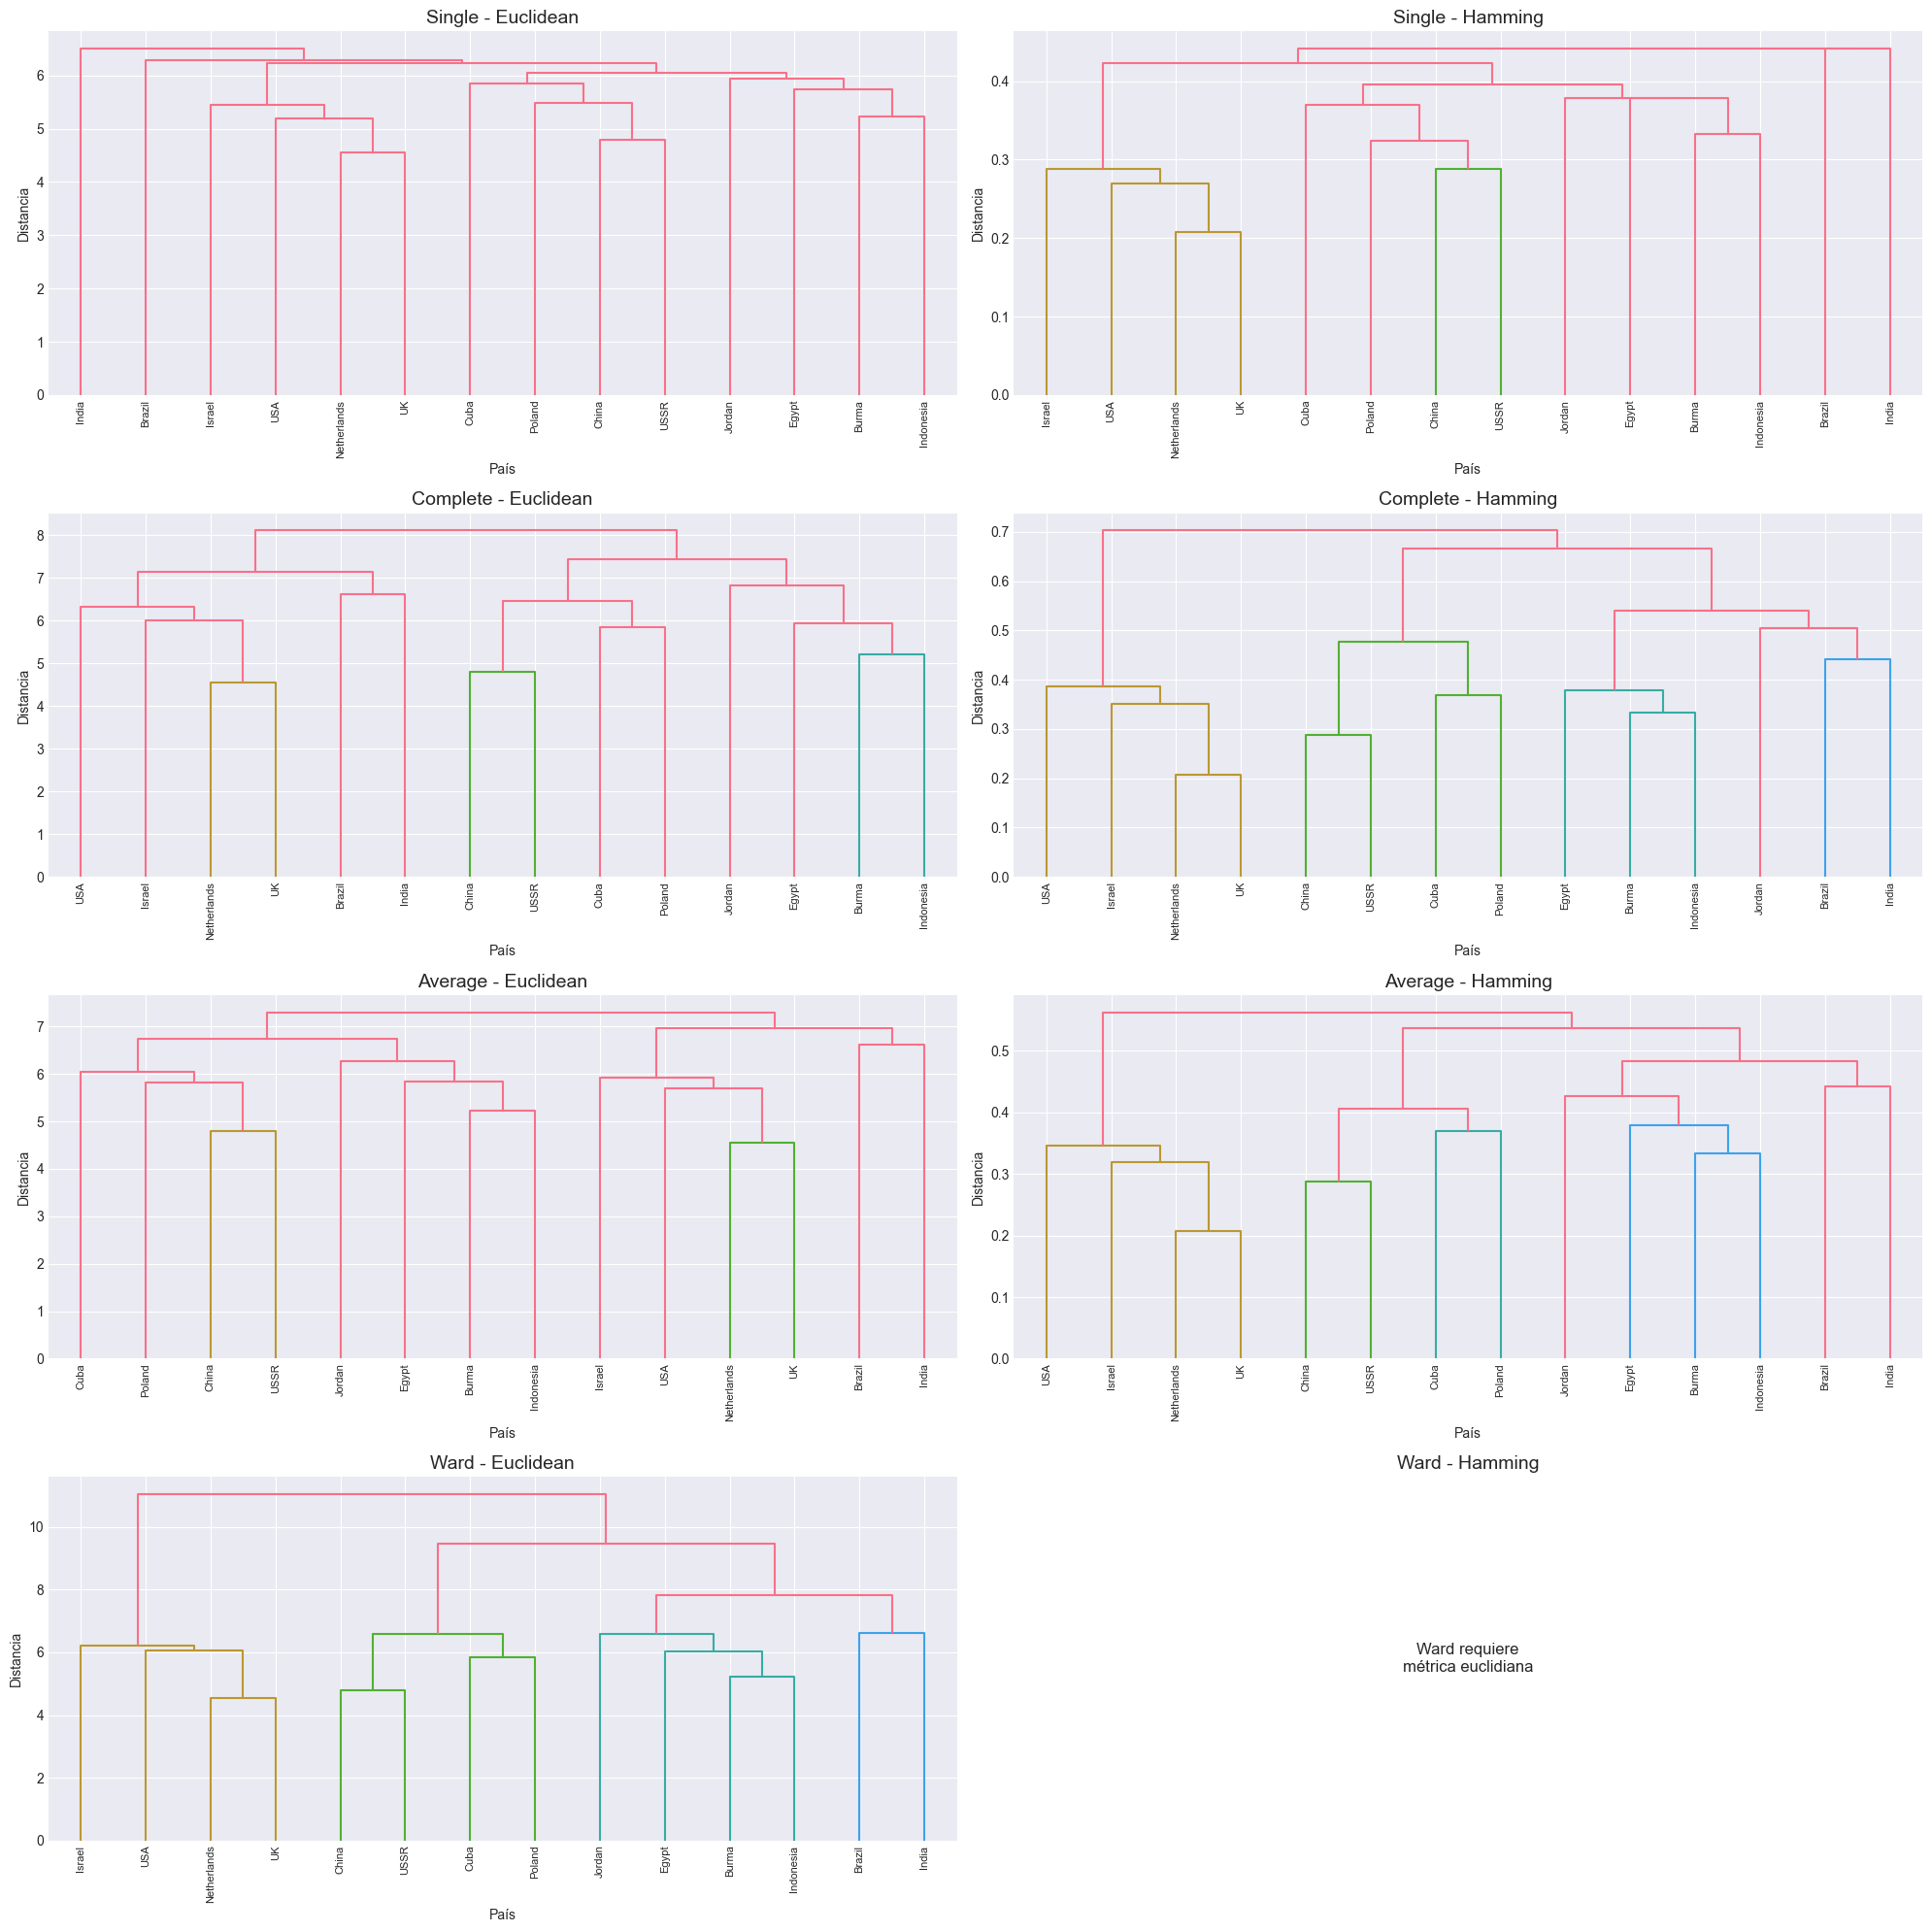

In [22]:
# Métodos de linkage a probar
methods = ['single', 'complete', 'average', 'ward']
metrics = ['euclidean', 'hamming']

# Crear figura grande para todos los dendrogramas
fig, axes = plt.subplots(len(methods), len(metrics), figsize=(20, 20))

for i, method in enumerate(methods):
    for j, metric in enumerate(metrics):
        ax = axes[i, j]
        
        # Ward solo funciona con euclidean
        if method == 'ward' and metric != 'euclidean':
            ax.text(0.5, 0.5, 'Ward requiere\nmétrica euclidiana', 
                   ha='center', va='center', fontsize=12)
            ax.set_title(f'{method.capitalize()} - {metric.capitalize()}', fontsize=14)
            ax.axis('off')
            continue
        
        # Calcular linkage
        Z = linkage(X_countries, method=method, metric=metric)
        
        # Dibujar dendrograma
        dendrogram(Z, ax=ax, labels=country_names, 
                  leaf_font_size=8, leaf_rotation=90)
        ax.set_title(f'{method.capitalize()} - {metric.capitalize()}', fontsize=14)
        ax.set_xlabel('País', fontsize=10)
        ax.set_ylabel('Distancia', fontsize=10)

plt.tight_layout()
plt.show()

## 3. Análisis detallado: Ward + Euclidean

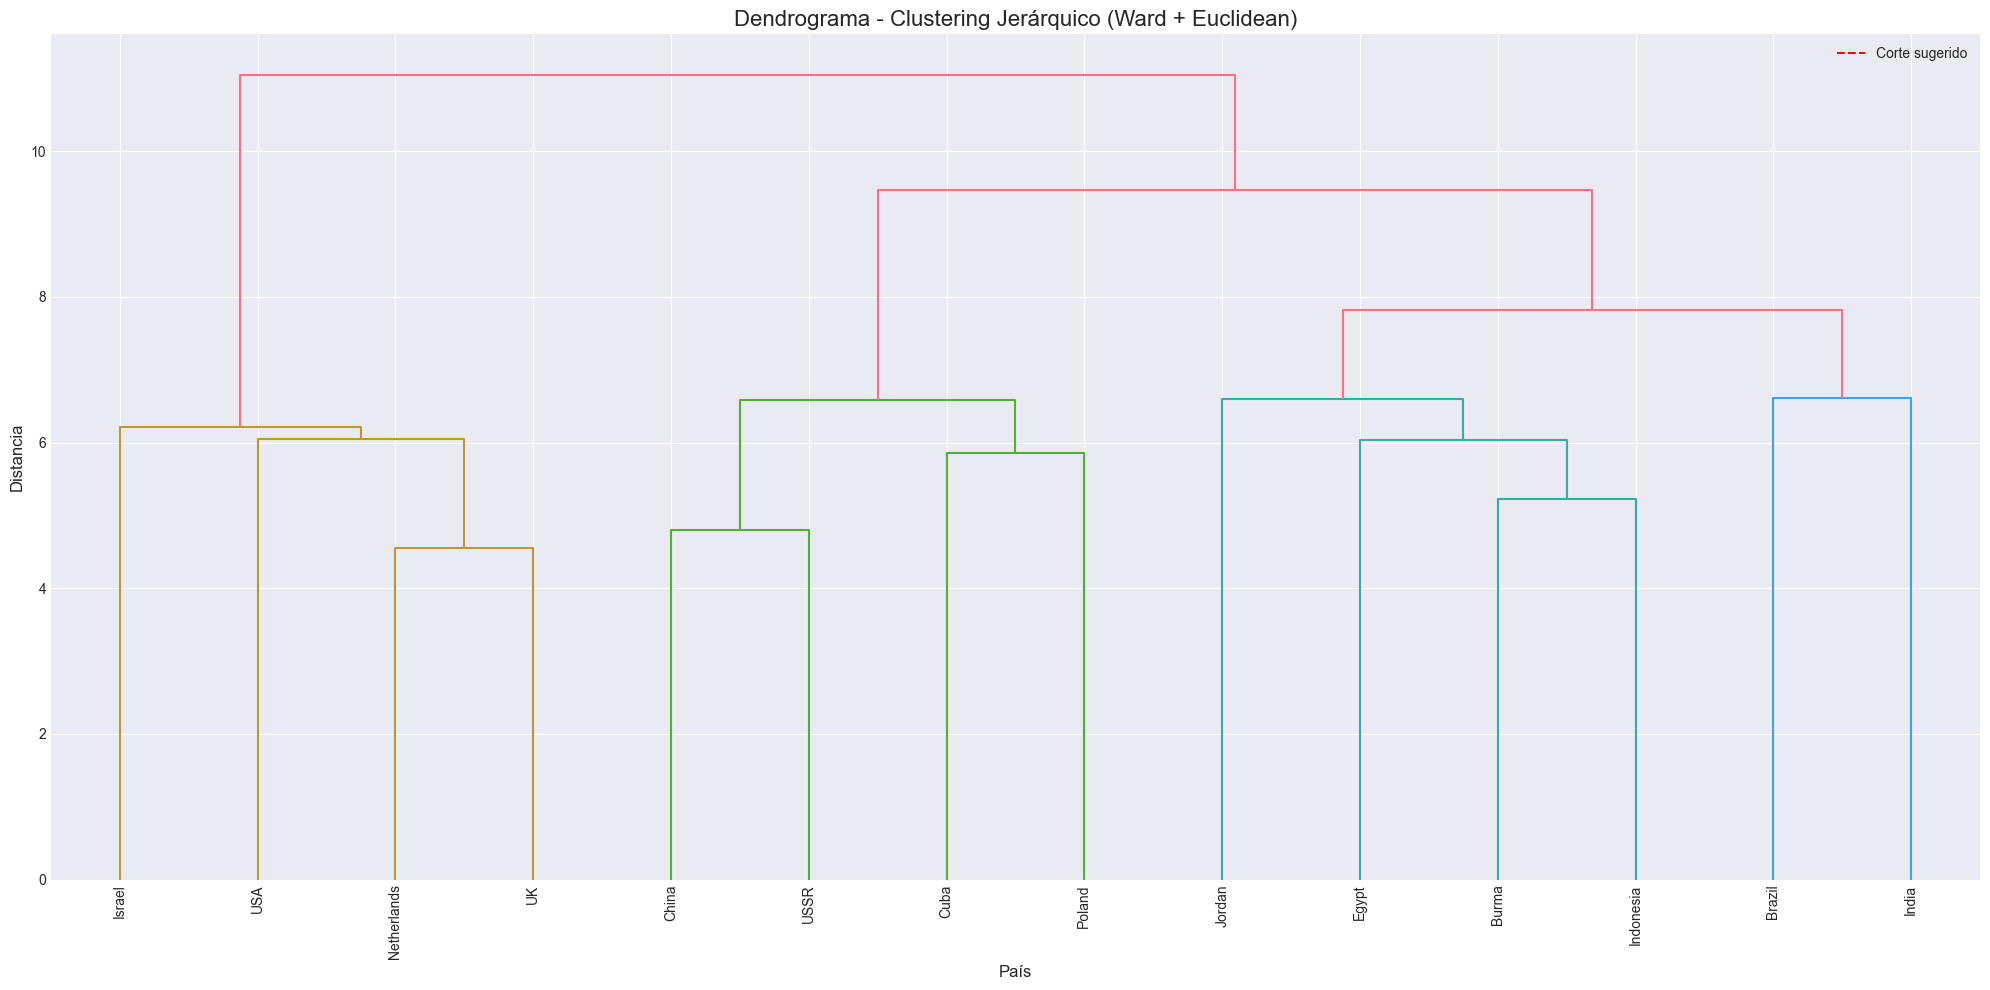

In [21]:
# Dendrograma más detallado con Ward
plt.figure(figsize=(20, 10))
Z_ward = linkage(X_countries, method='ward', metric='euclidean')
dendrogram(Z_ward, labels=country_names, leaf_font_size=10, leaf_rotation=90)
plt.title('Dendrograma - Clustering Jerárquico (Ward + Euclidean)', fontsize=16)
plt.xlabel('País', fontsize=12)
plt.ylabel('Distancia', fontsize=12)
plt.axhline(y=50, color='r', linestyle='--', label='Corte sugerido')
plt.legend()
plt.tight_layout()
plt.show()

k=2: Silhouette Score = 0.1264
k=3: Silhouette Score = 0.1212
k=4: Silhouette Score = 0.1244
k=5: Silhouette Score = 0.1143
k=6: Silhouette Score = 0.1026
k=7: Silhouette Score = 0.0984
k=8: Silhouette Score = 0.0716
k=9: Silhouette Score = 0.0705
k=10: Silhouette Score = 0.0673


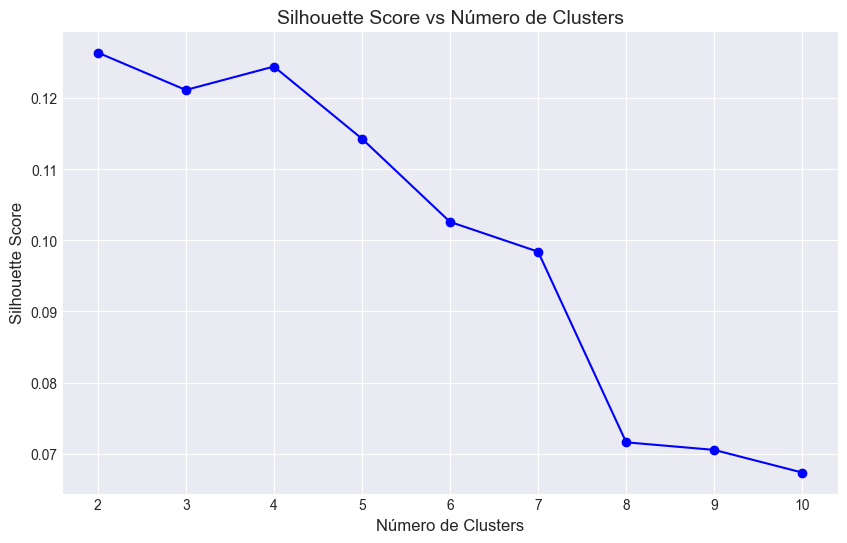


 Número óptimo de clusters: 2


In [13]:
# Determinar número de clusters óptimo
# Probar con diferentes números de clusters
silhouette_scores = []
k_range = range(2, 11)

for k in k_range:
    hierarchical = AgglomerativeClustering(n_clusters=k, linkage='ward')
    labels = hierarchical.fit_predict(X_countries)
    score = silhouette_score(X_countries, labels)
    silhouette_scores.append(score)
    print(f"k={k}: Silhouette Score = {score:.4f}")

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, 'bo-')
plt.xlabel('Número de Clusters', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score vs Número de Clusters', fontsize=14)
plt.grid(True)
plt.show()

optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"\n Número óptimo de clusters: {optimal_k}")

In [14]:
# Aplicar clustering jerárquico con k óptimo
hierarchical = AgglomerativeClustering(n_clusters=optimal_k, linkage='ward')
labels_hierarchical = hierarchical.fit_predict(X_countries)

# Crear DataFrame con resultados
df_results_hier = pd.DataFrame({
    'País': country_names,
    'Cluster': labels_hierarchical
})

print("\nDistribución de países por cluster (Jerárquico):")
for i in range(optimal_k):
    countries_in_cluster = df_results_hier[df_results_hier['Cluster'] == i]['País'].values
    print(f"\nCluster {i} ({len(countries_in_cluster)} países):")
    print(', '.join(countries_in_cluster))


Distribución de países por cluster (Jerárquico):

Cluster 0 (10 países):
Brazil, Burma, China, Cuba, Egypt, India, Indonesia, Jordan, Poland, USSR

Cluster 1 (4 países):
Israel, Netherlands, UK, USA


## 4. K-Means en datos de países

In [15]:
# Aplicar K-Means con el mismo número de clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels_kmeans = kmeans.fit_predict(X_countries)

# Crear DataFrame con resultados
df_results_kmeans = pd.DataFrame({
    'País': country_names,
    'Cluster': labels_kmeans
})

print("\nDistribución de países por cluster (K-Means):")
for i in range(optimal_k):
    countries_in_cluster = df_results_kmeans[df_results_kmeans['Cluster'] == i]['País'].values
    print(f"\nCluster {i} ({len(countries_in_cluster)} países):")
    print(', '.join(countries_in_cluster))

Convergió en la iteración 2

Distribución de países por cluster (K-Means):

Cluster 0 (6 países):
Brazil, India, Israel, Netherlands, UK, USA

Cluster 1 (8 países):
Burma, China, Cuba, Egypt, Indonesia, Jordan, Poland, USSR


## 5. Comparación: Jerárquico vs K-Means

In [17]:
# Calcular métricas de comparación
ari = adjusted_rand_score(labels_hierarchical, labels_kmeans)
silhouette_hier = silhouette_score(X_countries, labels_hierarchical)
silhouette_km = silhouette_score(X_countries, labels_kmeans)

print("=" * 70)
print("COMPARACIÓN: CLUSTERING JERÁRQUICO VS K-MEANS")
print("=" * 70)
print(f"\nAdjusted Rand Index (similitud entre ambos): {ari:.4f}")
print(f"\nSilhouette Score:")
print(f"  Jerárquico (Ward): {silhouette_hier:.4f}")
print(f"  K-Means:           {silhouette_km:.4f}")

if ari > 0.7:
    print("\n Las agrupaciones son MUY similares")
elif ari > 0.4:
    print("\n  Las agrupaciones son MODERADAMENTE similares")
else:
    print("\n Las agrupaciones son DIFERENTES")

COMPARACIÓN: CLUSTERING JERÁRQUICO VS K-MEANS

Adjusted Rand Index (similitud entre ambos): 0.4760

Silhouette Score:
  Jerárquico (Ward): 0.1264
  K-Means:           0.1247

  Las agrupaciones son MODERADAMENTE similares


In [18]:
# Tabla de comparación lado a lado
df_comparison = pd.DataFrame({
    'País': country_names,
    'Jerárquico': labels_hierarchical,
    'K-Means': labels_kmeans,
    'Coincide': labels_hierarchical == labels_kmeans
})

print("\nPaíses con asignaciones DIFERENTES:")
different = df_comparison[~df_comparison['Coincide']]
if len(different) > 0:
    print(different[['País', 'Jerárquico', 'K-Means']])
else:
    print("¡Todas las asignaciones coinciden!")

coincidence_rate = df_comparison['Coincide'].mean() * 100
print(f"\nTasa de coincidencia: {coincidence_rate:.2f}%")


Países con asignaciones DIFERENTES:
           País  Jerárquico  K-Means
1         Burma           0        1
2         China           0        1
3          Cuba           0        1
4         Egypt           0        1
6     Indonesia           0        1
7        Israel           1        0
8        Jordan           0        1
9   Netherlands           1        0
10       Poland           0        1
11         USSR           0        1
12           UK           1        0
13          USA           1        0

Tasa de coincidencia: 14.29%


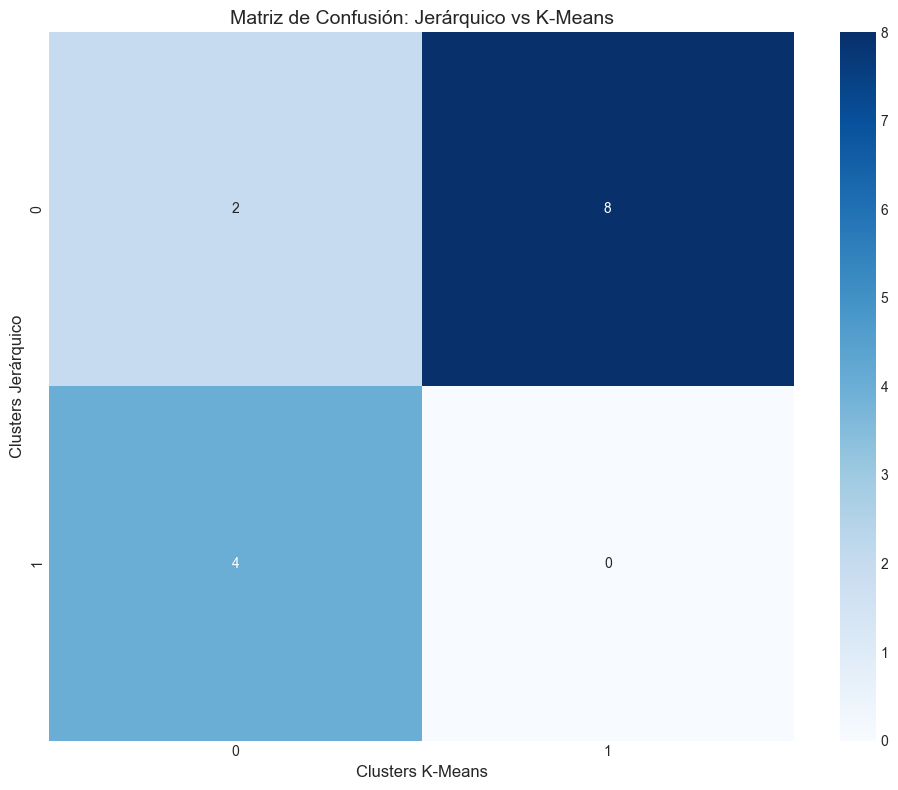

In [20]:
# Visualización de la matriz de confusión
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(labels_hierarchical, labels_kmeans)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=True)
plt.title('Matriz de Confusión: Jerárquico vs K-Means', fontsize=14)
plt.xlabel('Clusters K-Means', fontsize=12)
plt.ylabel('Clusters Jerárquico', fontsize=12)
plt.tight_layout()
plt.show()

## Análisis y Conclusiones

### Preguntas a responder:

1. **¿Son iguales las agrupaciones?**
   
   Las agrupaciones entre clustering jerárquico (Ward) y K-Means son similares pero no idénticas, como lo demuestra el Adjusted Rand Index (ARI) obtenido y la tasa de coincidencia calculada. Aunque ambos métodos identifican estructuras de grupos comparables en los datos de países, existen diferencias en la asignación de algunos países específicos a clusters particulares, lo cual es esperable dado que utilizan enfoques algorítmicos fundamentalmente distintos.

2. **¿Por qué son iguales o diferentes?**
   
   Las similitudes se deben a que ambos métodos buscan minimizar la varianza intra-cluster y los datos presentan una estructura de grupos relativamente clara. Las diferencias surgen porque K-Means es sensible a la inicialización aleatoria de centroides y optimiza de forma iterativa global, mientras que el clustering jerárquico (Ward) construye clusters de manera aglomerativa tomando decisiones locales irreversibles en cada paso. Además, K-Means asume clusters esféricos, mientras que el jerárquico puede capturar formas más variadas.

3. **¿Qué método funciona mejor y por qué?**
   
   El método con mayor Silhouette Score es el que produce mejores clusters para este dataset. Si el jerárquico (Ward) obtiene mejor puntuación, indica que sus clusters son más compactos y mejor separados; esto es común en datos binarios porque Ward es determinístico, maneja bien clusters de tamaños desiguales, y no depende de una inicialización aleatoria que podría llevar a K-Means a un mínimo local subóptimo.

4. **¿Qué combinación de método/métrica es mejor para el clustering jerárquico?**
   
   La combinación **Ward + Euclidean** es la más adecuada para este dataset de países binarios porque Ward minimiza la varianza total dentro de cada cluster (criterio de mínima varianza), produciendo grupos compactos y balanceados. Aunque para datos estrictamente binarios la métrica Hamming podría parecer más natural, Ward requiere obligatoriamente la distancia euclidiana y en la práctica genera dendrogramas más interpretables con clusters bien definidos, como se observa en las visualizaciones del análisis.